### Generating hand written digits

After learning from MNIST, using GAN

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn.init as init

from torch.autograd import Variable
from torchvision import datasets
from torchvision import utils

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline

In [2]:
bs = 6000
img_height = 28  # Square 
# Learning rate
lr = 1e-3
num_epochs = 2000

In [3]:
# Fetch the data, and prepare the dataset and dataloader
trans = transforms.Compose([transforms.ToTensor(),])
dataset = datasets.MNIST('/home/as/datasets/pytorch.mnist', transform=trans, download=True)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=bs, shuffle=True, num_workers=4, pin_memory=True)

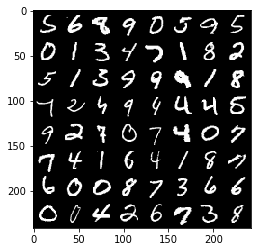

In [4]:
# Let's see some images

imgs, lables = next(iter(dataloader))
grid = utils.make_grid(imgs[:64])
grid = grid.numpy().transpose((1, 2, 0))
plt.imshow(grid)

In [5]:
# Constants

# Dimensions for random noise
z_dim = 100

# Dimensions for Generator
G_in, G_hidden, G_out = 100, 128, 784  # 784 is 28 * 28, dimensions of an MNIST digit

# Dimensions for Discrimininator
D_in, D_hidden, D_out = 784, 128, 1  # 784 is 28 * 28, dimensions of an MNIST digit

In [6]:
class TwoLayerNet(nn.Module):
    
    def __init__(self, dim_in, dim_hidden, dim_out):
        
        super(TwoLayerNet, self).__init__()
        
        self.linear1 = nn.Linear(dim_in, dim_hidden, bias=True)
        self.linear2 = nn.Linear(dim_hidden, dim_out, bias=True)
        
        init.xavier_normal(self.linear1.weight)
        init.xavier_normal(self.linear2.weight)
        
    def forward(self, x):
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        x = F.sigmoid(x)
        return x
    
G = TwoLayerNet(G_in, G_hidden, G_out).cuda()
D = TwoLayerNet(D_in, D_hidden, D_out).cuda()

In [7]:
optim_D = optim.Adam(D.parameters(), lr=lr)
optim_G = optim.Adam(G.parameters(), lr=lr)
criteria = nn.BCELoss()

In [8]:
d_loss_trend = list()
g_loss_trend = list()

for n in range(num_epochs):
    
    for batch_num, data in enumerate(dataloader):
        
        # Discriminator ==
        imgs = Variable(data[0]).cuda()
        
        loop_bs = len(imgs)
        ones = Variable(torch.ones((loop_bs, 1))).cuda()
        zeros = Variable(torch.zeros((loop_bs, 1))).cuda()
        
        x = imgs.resize(loop_bs, img_height*img_height)  # torch.Size([64, 784])
        z = Variable(torch.randn(loop_bs, G_in)).cuda()  # torch.Size([64, 100])
        G_output = G(z)
        D_output_real = D(x)
        D_output_fake = D(G_output)
        
        # print(D_real.data.shape)                  # torch.Size([64, 1])
        # print(D_fake.data.shape)                  # torch.Size([64, 1])
        # print(G_output.data.shape)                # torch.Size([64, 784])
        
        #D_loss = -torch.mean(torch.log(D_output_real) + torch.log(1. - D_output_fake))
        D_loss_real = criteria(D_output_real, ones)
        D_loss_fake = criteria(D_output_fake, zeros)
        D_loss = torch.mean(D_loss_real + D_loss_fake)
        
        d_loss_trend.append(D_loss)
        D_loss.backward()
        optim_D.step()
        
        # Reset
        optim_D.zero_grad()
        optim_G.zero_grad()
        
        
        # Generator ==
        z = Variable(torch.randn(loop_bs, G_in)).cuda()
        G_output = G(z)
        D_output_fake = D(G_output)
       
        #G_loss = -torch.mean(torch.log(D_output_fake))
        G_loss = torch.mean(criteria(D_output_fake, ones))
        
        g_loss_trend.append(G_loss)
        G_loss.backward()
        optim_G.step()    
        
        # Reset
        optim_D.zero_grad()
        optim_G.zero_grad()
        
        
    print('Epoch', n, ', ', end='')

Epoch 0 , Epoch 1 , Epoch 2 , Epoch 3 , Epoch 4 , Epoch 5 , Epoch 6 , Epoch 7 , Epoch 8 , Epoch 9 , Epoch 10 , Epoch 11 , Epoch 12 , Epoch 13 , Epoch 14 , Epoch 15 , Epoch 16 , Epoch 17 , Epoch 18 , Epoch 19 , Epoch 20 , Epoch 21 , Epoch 22 , Epoch 23 , Epoch 24 , Epoch 25 , Epoch 26 , Epoch 27 , Epoch 28 , Epoch 29 , Epoch 30 , Epoch 31 , Epoch 32 , Epoch 33 , Epoch 34 , Epoch 35 , Epoch 36 , Epoch 37 , Epoch 38 , Epoch 39 , Epoch 40 , Epoch 41 , Epoch 42 , Epoch 43 , Epoch 44 , Epoch 45 , Epoch 46 , Epoch 47 , Epoch 48 , Epoch 49 , Epoch 50 , Epoch 51 , Epoch 52 , Epoch 53 , Epoch 54 , Epoch 55 , Epoch 56 , Epoch 57 , Epoch 58 , Epoch 59 , Epoch 60 , Epoch 61 , Epoch 62 , Epoch 63 , Epoch 64 , Epoch 65 , Epoch 66 , Epoch 67 , Epoch 68 , Epoch 69 , Epoch 70 , Epoch 71 , Epoch 72 , Epoch 73 , Epoch 74 , Epoch 75 , Epoch 76 , Epoch 77 , Epoch 78 , Epoch 79 , Epoch 80 , Epoch 81 , Epoch 82 , Epoch 83 , Epoch 84 , Epoch 85 , Epoch 86 , Epoch 87 , Epoch 88 , Epoch 89 , Epoch 90 , Epoch 91 

Epoch 692 , Epoch 693 , Epoch 694 , Epoch 695 , Epoch 696 , Epoch 697 , Epoch 698 , Epoch 699 , Epoch 700 , Epoch 701 , Epoch 702 , Epoch 703 , Epoch 704 , Epoch 705 , Epoch 706 , Epoch 707 , Epoch 708 , Epoch 709 , Epoch 710 , Epoch 711 , Epoch 712 , Epoch 713 , Epoch 714 , Epoch 715 , Epoch 716 , Epoch 717 , Epoch 718 , Epoch 719 , Epoch 720 , Epoch 721 , Epoch 722 , Epoch 723 , Epoch 724 , Epoch 725 , Epoch 726 , Epoch 727 , Epoch 728 , Epoch 729 , Epoch 730 , Epoch 731 , Epoch 732 , Epoch 733 , Epoch 734 , Epoch 735 , Epoch 736 , Epoch 737 , Epoch 738 , Epoch 739 , Epoch 740 , Epoch 741 , Epoch 742 , Epoch 743 , Epoch 744 , Epoch 745 , Epoch 746 , Epoch 747 , Epoch 748 , Epoch 749 , Epoch 750 , Epoch 751 , Epoch 752 , Epoch 753 , Epoch 754 , Epoch 755 , Epoch 756 , Epoch 757 , Epoch 758 , Epoch 759 , Epoch 760 , Epoch 761 , Epoch 762 , Epoch 763 , Epoch 764 , Epoch 765 , Epoch 766 , Epoch 767 , Epoch 768 , Epoch 769 , Epoch 770 , Epoch 771 , Epoch 772 , Epoch 773 , Epoch 774 , Epoc

Epoch 1346 , Epoch 1347 , Epoch 1348 , Epoch 1349 , Epoch 1350 , Epoch 1351 , Epoch 1352 , Epoch 1353 , Epoch 1354 , Epoch 1355 , Epoch 1356 , Epoch 1357 , Epoch 1358 , Epoch 1359 , Epoch 1360 , Epoch 1361 , Epoch 1362 , Epoch 1363 , Epoch 1364 , Epoch 1365 , Epoch 1366 , Epoch 1367 , Epoch 1368 , Epoch 1369 , Epoch 1370 , Epoch 1371 , Epoch 1372 , Epoch 1373 , Epoch 1374 , Epoch 1375 , Epoch 1376 , Epoch 1377 , Epoch 1378 , Epoch 1379 , Epoch 1380 , Epoch 1381 , Epoch 1382 , Epoch 1383 , Epoch 1384 , Epoch 1385 , Epoch 1386 , Epoch 1387 , Epoch 1388 , Epoch 1389 , Epoch 1390 , Epoch 1391 , Epoch 1392 , Epoch 1393 , Epoch 1394 , Epoch 1395 , Epoch 1396 , Epoch 1397 , Epoch 1398 , Epoch 1399 , Epoch 1400 , Epoch 1401 , Epoch 1402 , Epoch 1403 , Epoch 1404 , Epoch 1405 , Epoch 1406 , Epoch 1407 , Epoch 1408 , Epoch 1409 , Epoch 1410 , Epoch 1411 , Epoch 1412 , Epoch 1413 , Epoch 1414 , Epoch 1415 , Epoch 1416 , Epoch 1417 , Epoch 1418 , Epoch 1419 , Epoch 1420 , Epoch 1421 , Epoch 1422 ,

Epoch 1977 , Epoch 1978 , Epoch 1979 , Epoch 1980 , Epoch 1981 , Epoch 1982 , Epoch 1983 , Epoch 1984 , Epoch 1985 , Epoch 1986 , Epoch 1987 , Epoch 1988 , Epoch 1989 , Epoch 1990 , Epoch 1991 , Epoch 1992 , Epoch 1993 , Epoch 1994 , Epoch 1995 , Epoch 1996 , Epoch 1997 , Epoch 1998 , Epoch 1999 , 

Text(0.5,1,'Discriminator loss')

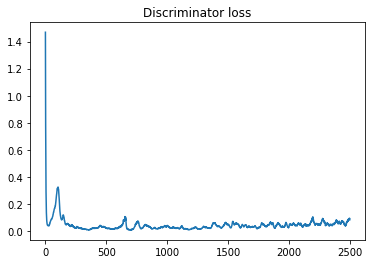

In [9]:
dl = []
for d in d_loss_trend[:2500]:
    dl.append(d.cpu().data.numpy()[0])

plt.plot(dl)
plt.title('Discriminator loss')

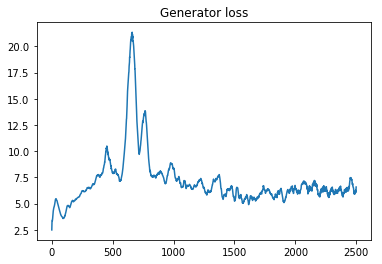

In [10]:
gl = []
for g in g_loss_trend[:2500]:
    gl.append(g.cpu().data.numpy()[0])

plt.title('Generator loss')
plt.plot(gl)

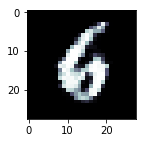

In [46]:
z = Variable(torch.randn(1, 100)).cuda()
G_output = G(z)
G_output.data.shape
img = G_output.data.cpu().numpy()[0]
img2 = img.reshape(28, 28)

fig = plt.figure(figsize=(2, 2))
plt.imshow(img2, cmap=cm.bone)